In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

# Load the dataset
url = "https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset"
df = pd.read_csv(r"C:\Users\15sdu3074tx\OneDrive\Desktop\Projects_Edureka\heartdisease.csv") 

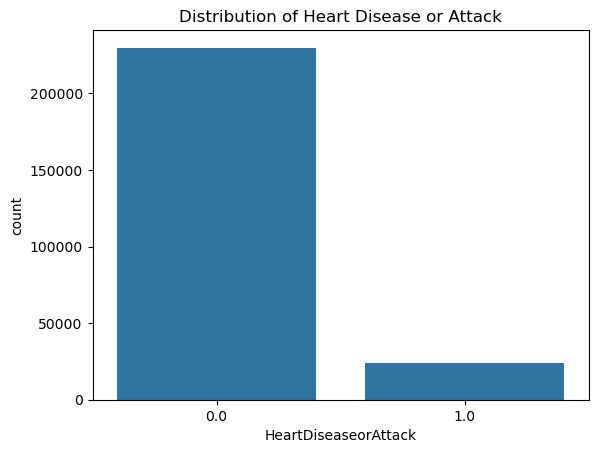

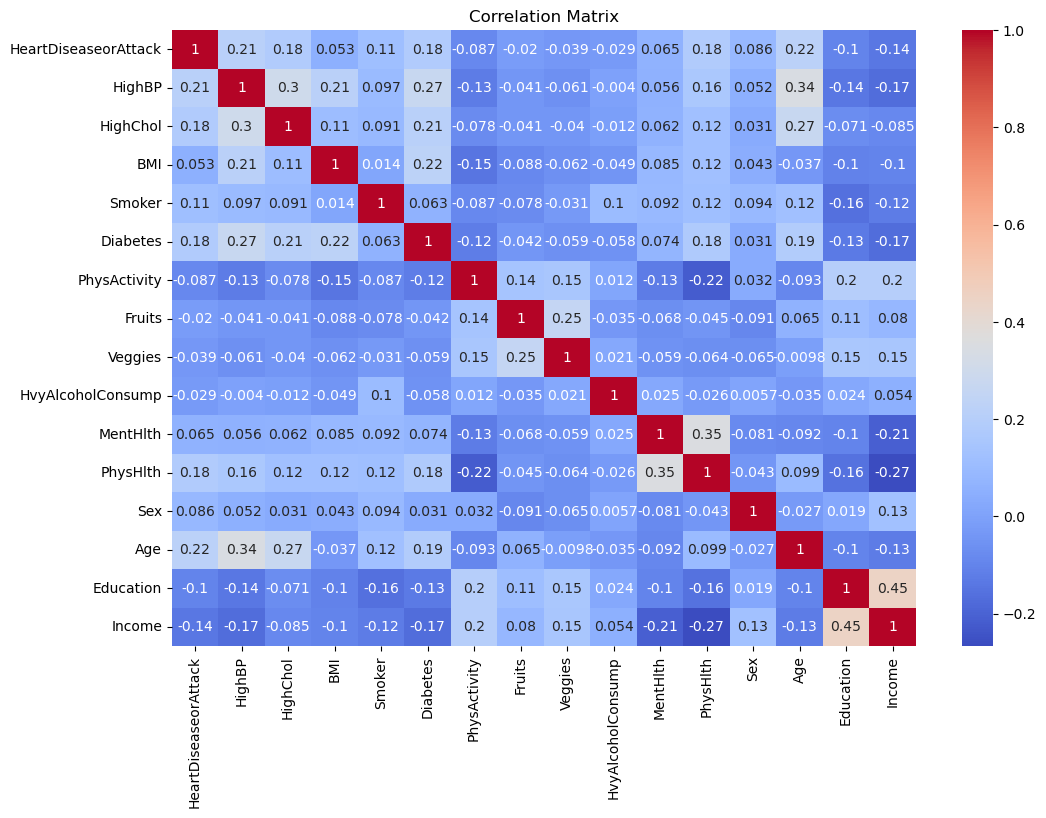

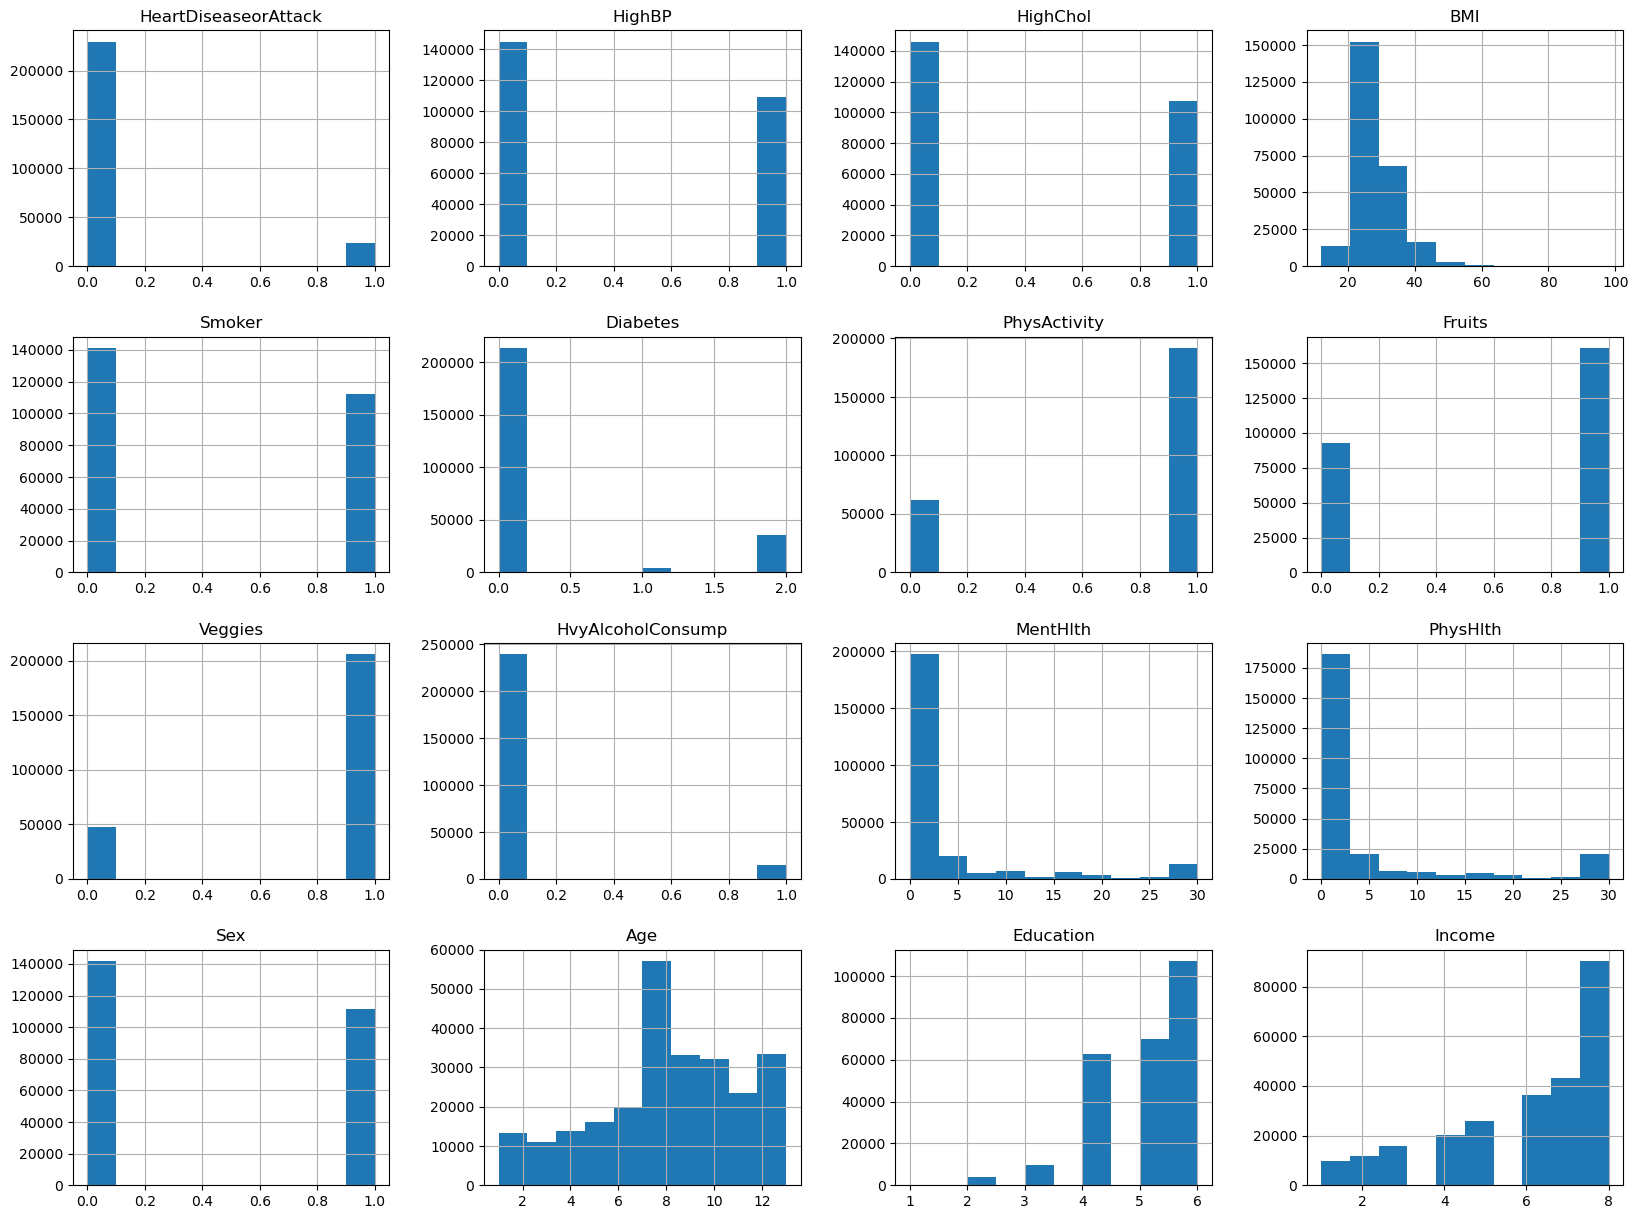

In [16]:
# Display the first 5 rows of the dataset
df.head()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

# Distribution of the target variable
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.title("Distribution of Heart Disease or Attack")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Univariate analysis for numerical features
df.hist(figsize=(20, 15))
plt.show()

In [18]:
# Create new features if needed (e.g., BMI categories)
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Encode categorical variables (if any)
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)

# Separate features and target variable
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.53      0.07      0.12      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.53      0.54     50736
weighted avg       0.88      0.91      0.87     50736



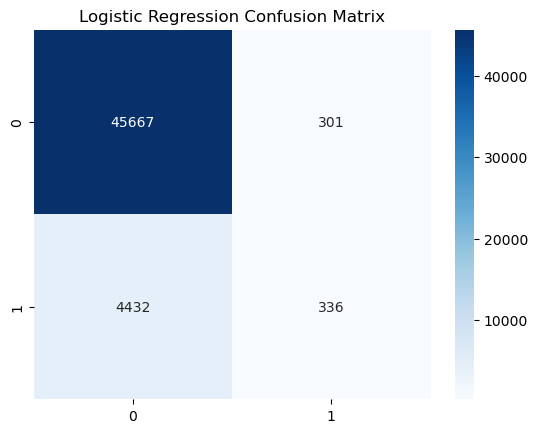

In [20]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45968
         1.0       0.31      0.07      0.12      4768

    accuracy                           0.90     50736
   macro avg       0.61      0.53      0.53     50736
weighted avg       0.85      0.90      0.87     50736



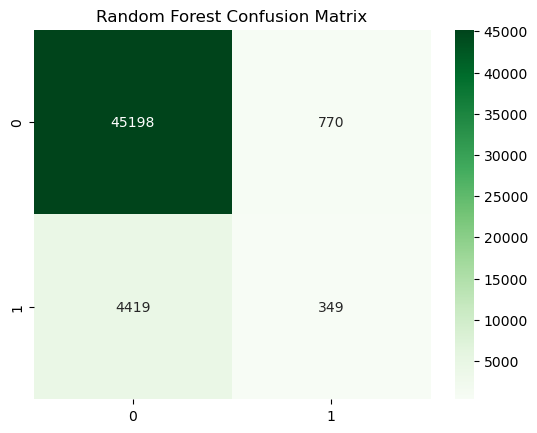

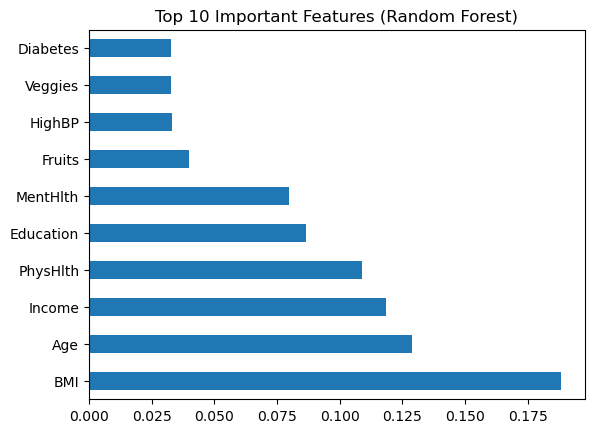

In [27]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.44      0.05      0.09      4768

    accuracy                           0.90     50736
   macro avg       0.68      0.52      0.52     50736
weighted avg       0.87      0.90      0.87     50736



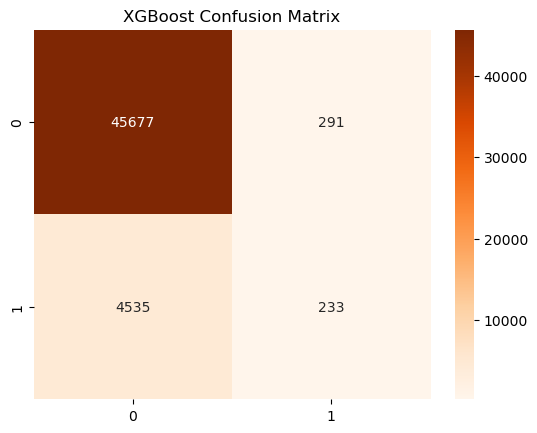

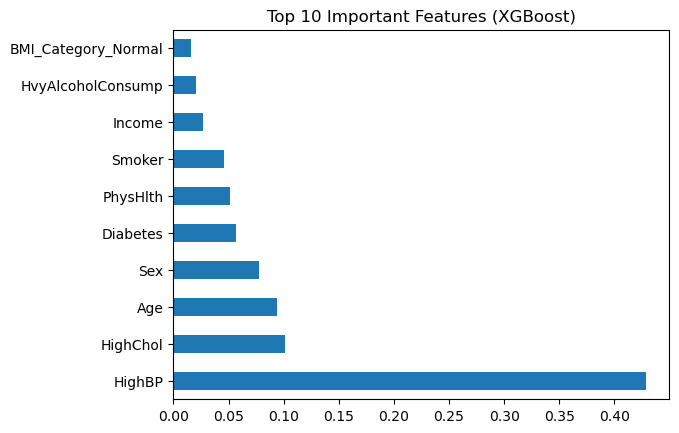

In [28]:
# XGBoost is a powerful boosting algorithm that often outperforms other models in classification tasks.

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature Importance
xgb_feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

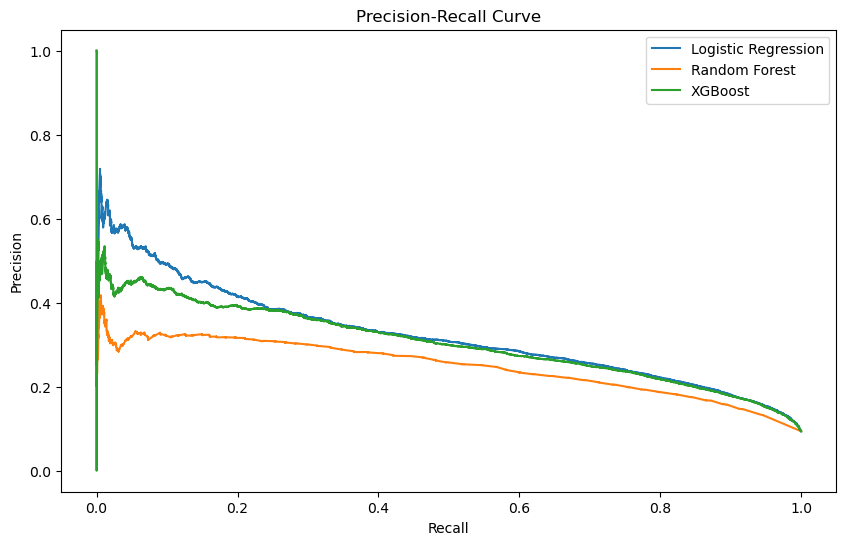

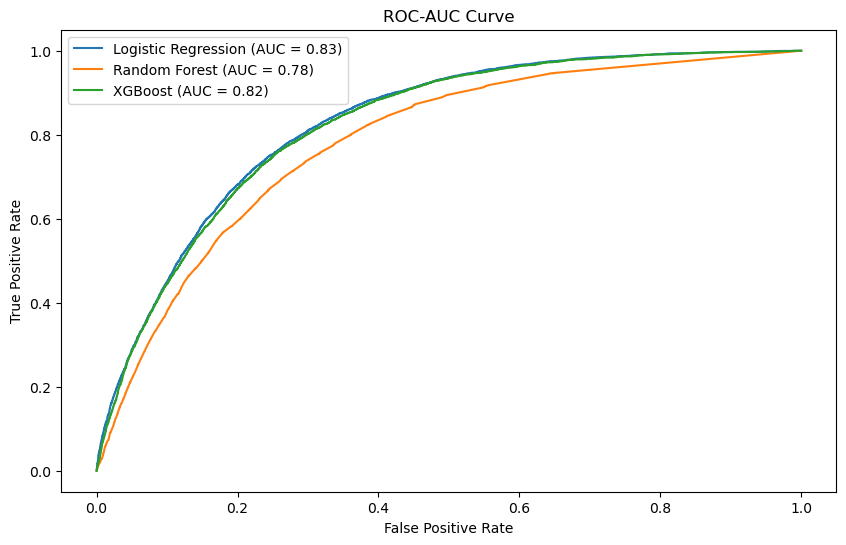

In [29]:
# The models are compared using precision-recall and ROC-AUC curves to determine the best-performing model.

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for model, name in zip([log_reg, rf, xgb], ['Logistic Regression', 'Random Forest', 'XGBoost']):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ROC-AUC Curve
plt.figure(figsize=(10, 6))
for model, name in zip([log_reg, rf, xgb], ['Logistic Regression', 'Random Forest', 'XGBoost']):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

In [31]:
# SMOTE is used to handle class imbalance, and the model is retrained on the balanced data.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_smote.predict(X_test)

print("XGBoost with SMOTE Classification Report:")
print(classification_report(y_test, y_pred_xgb_smote))

XGBoost with SMOTE Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.42      0.07      0.13      4768

    accuracy                           0.90     50736
   macro avg       0.67      0.53      0.54     50736
weighted avg       0.87      0.90      0.87     50736



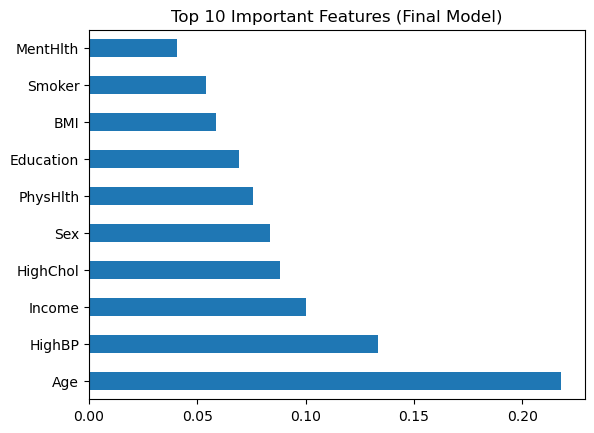

In [36]:
# The final model is selected, and the most important drivers of heart disease are identified.

final_model = xgb_smote

final_feature_importances = pd.Series(final_model.feature_importances_, index=X.columns)
final_feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Final Model)")
plt.show()

In [38]:
import joblib

# The final model is saved for deployment or future inference.
joblib.dump(final_model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [40]:
# The project concludes with a summary of the best model and key insights.
print("The best-performing model is XGBoost with SMOTE.")
print("The most important drivers of heart disease or attack are:")
print(final_feature_importances.nlargest(10))

The best-performing model is XGBoost with SMOTE.
The most important drivers of heart disease or attack are:
Age          0.218030
HighBP       0.133415
Income       0.100259
HighChol     0.087948
Sex          0.083641
PhysHlth     0.075790
Education    0.069186
BMI          0.058602
Smoker       0.054089
MentHlth     0.040682
dtype: float32
